In [85]:
# import all necessary libraries
import pandas as pd
import numpy as np
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import time
import json
import re
import math
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pickle
from datetime import datetime
from datetime import timedelta
import requests
%matplotlib inline
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [86]:
df_dict = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=['Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress'], header=1)

In [87]:
df_dict['Transactions'].set_index('transaction_date', inplace=True, drop=True)
df_dict['Transactions'].sort_values('transaction_date', inplace=True)

df_dict['NewCustomerList'].set_index('DOB', inplace=True, drop=True)
df_dict['NewCustomerList'].sort_values('DOB', inplace=True)

df_dict['CustomerDemographic'].set_index('customer_id', inplace=True, drop=True)
df_dict['CustomerDemographic'].sort_values('customer_id', inplace=True)

df_dict['CustomerAddress'].set_index('customer_id', inplace=True, drop=True)
df_dict['CustomerAddress'].sort_values('customer_id', inplace=True)

# Transactions

In [89]:
transactions = df_dict['Transactions']
transactions

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_date,,,,,,,,,,,,
2017-01-01,517,77,311,1.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,40672.0
2017-01-01,5877,67,138,0.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,38647.0
2017-01-01,3460,64,234,1.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40779.0
2017-01-01,12485,85,2805,1.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0
2017-01-01,19131,0,1707,0.0,Approved,Trek Bicycles,Road,medium,medium,290.62,215.14,38339.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30,606,70,2878,0.0,Approved,Trek Bicycles,Standard,high,medium,495.72,297.43,36367.0
2017-12-30,15270,3,195,0.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41167.0
2017-12-30,19907,41,1721,0.0,Approved,Norco Bicycles,Standard,low,medium,958.74,748.90,38693.0


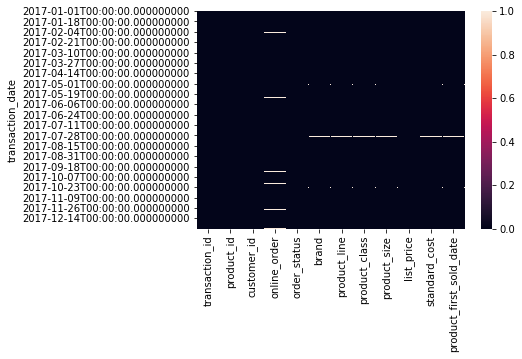

In [90]:
sns.heatmap(transactions.isna())

# NewCustomerList

In [91]:
new_customer_list = df_dict['NewCustomerList']
new_customer_list

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
DOB,,,,,,,,,,,,,,,,,,,,,,
1938-06-08,Anthony,Morison,Male,7,General Manager,Health,Mass Customer,N,No,12,276 Derek Circle,2759,NSW,Australia,9,0.73,0.7300,0.912500,0.775625,797,797,0.600000
1938-06-09,Zachariah,Meininking,Male,40,Cost Accountant,Financial Services,Affluent Customer,N,Yes,20,24815 Lindbergh Avenue,2749,NSW,Australia,7,1.10,1.3750,1.375000,1.375000,883,883,0.531250
1938-08-05,Andrea,Pendle,Female,86,NaN,NaN,High Net Worth,N,Yes,13,31281 Meadow Valley Way,4500,QLD,Australia,6,0.48,0.6000,0.750000,0.750000,760,760,0.637500
1938-08-30,Letizia,Poore,Female,27,Web Developer II,Manufacturing,Affluent Customer,N,No,15,95796 Mcbride Drive,3677,VIC,Australia,3,0.95,0.9500,0.950000,0.950000,583,583,0.787500
1938-08-31,Alleen,Eaken,Female,56,NaN,NaN,Mass Customer,N,No,10,343 Lakewood Center,2089,NSW,Australia,12,0.46,0.4600,0.575000,0.488750,259,259,1.062500
1938-09-02,Willard,Booton,Male,69,NaN,Health,High Net Worth,N,Yes,7,05 Ronald Regan Alley,2121,NSW,Australia,9,0.55,0.6875,0.859375,0.859375,688,688,0.697000
1938-09-10,Wyn,Meach,Male,37,NaN,Manufacturing,Mass Customer,N,No,9,79 Armistice Junction,2765,NSW,Australia,9,0.61,0.6100,0.762500,0.648125,415,415,0.921875
1938-10-16,Franklin,Wohler,Male,55,Clinical Specialist,Health,Mass Customer,N,Yes,7,6966 Delladonna Street,2250,NSW,Australia,8,0.80,1.0000,1.000000,0.850000,191,191,1.150000
1938-11-09,Odilia,Quick,Female,65,General Manager,Manufacturing,Affluent Customer,N,Yes,11,1550 Russell Way,2222,NSW,Australia,11,1.00,1.2500,1.562500,1.562500,19,19,1.531250


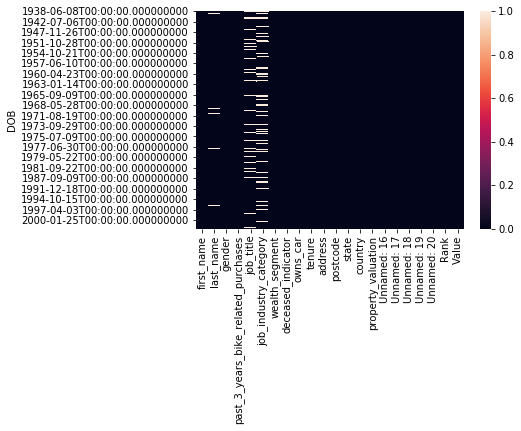

In [92]:
sns.heatmap(new_customer_list.isna())

# CustomerDemographic

In [93]:
customer_demographic = df_dict['CustomerDemographic']
customer_demographic

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN


(array([2024.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1976.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

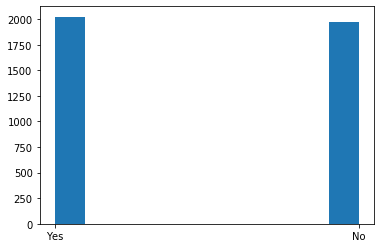

In [94]:
plt.hist(customer_demographic.owns_car)

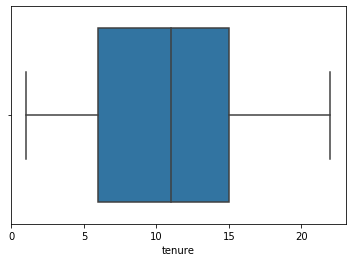

In [95]:
sns.boxplot(customer_demographic.tenure)

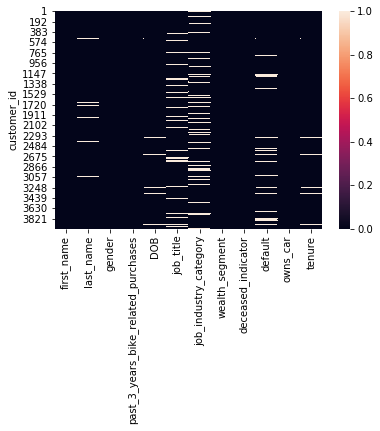

In [96]:
sns.heatmap(customer_demographic.isna())

# CustomerAddress

In [97]:
customer_address = df_dict['CustomerAddress']
customer_address

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,New South Wales,Australia,10
2,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,New South Wales,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...
3999,1482 Hauk Trail,3064,VIC,Australia,3
4000,57042 Village Green Point,4511,QLD,Australia,6
4001,87 Crescent Oaks Alley,2756,NSW,Australia,10


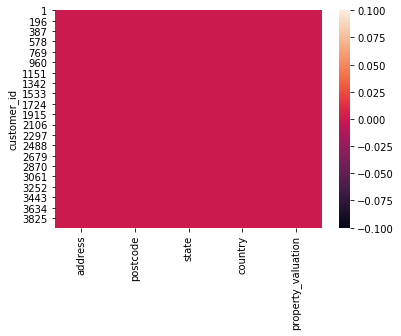

In [98]:
sns.heatmap(customer_address.isna())

In [101]:
transactions['profit'] = transactions.list_price - transactions.standard_cost

In [102]:
transactions

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
transaction_date,,,,,,,,,,,,,
2017-01-01,517,77,311,1.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,40672.0,1660.88
2017-01-01,5877,67,138,0.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,38647.0,167.21
2017-01-01,3460,64,234,1.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40779.0,217.51
2017-01-01,12485,85,2805,1.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0,827.16
2017-01-01,19131,0,1707,0.0,Approved,Trek Bicycles,Road,medium,medium,290.62,215.14,38339.0,75.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30,606,70,2878,0.0,Approved,Trek Bicycles,Standard,high,medium,495.72,297.43,36367.0,198.29
2017-12-30,15270,3,195,0.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41167.0,1702.55
2017-12-30,19907,41,1721,0.0,Approved,Norco Bicycles,Standard,low,medium,958.74,748.90,38693.0,209.84


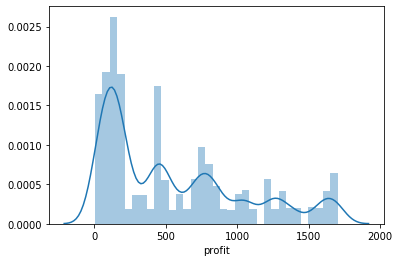

In [103]:
sns.distplot(transactions.profit)